<a href="https://colab.research.google.com/github/OscarTMa/DeepLearning/blob/master/notebooks/DataSetCIFAR10_NVIDIA_DIGITS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt


In [2]:
# Step 1: Load CIFAR-10 Dataset
print("Loading CIFAR-10 dataset...")
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()

Loading CIFAR-10 dataset...
170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [3]:
# Normalize pixel values between 0 and 1
x_train, x_test = x_train / 255.0, x_test / 255.0

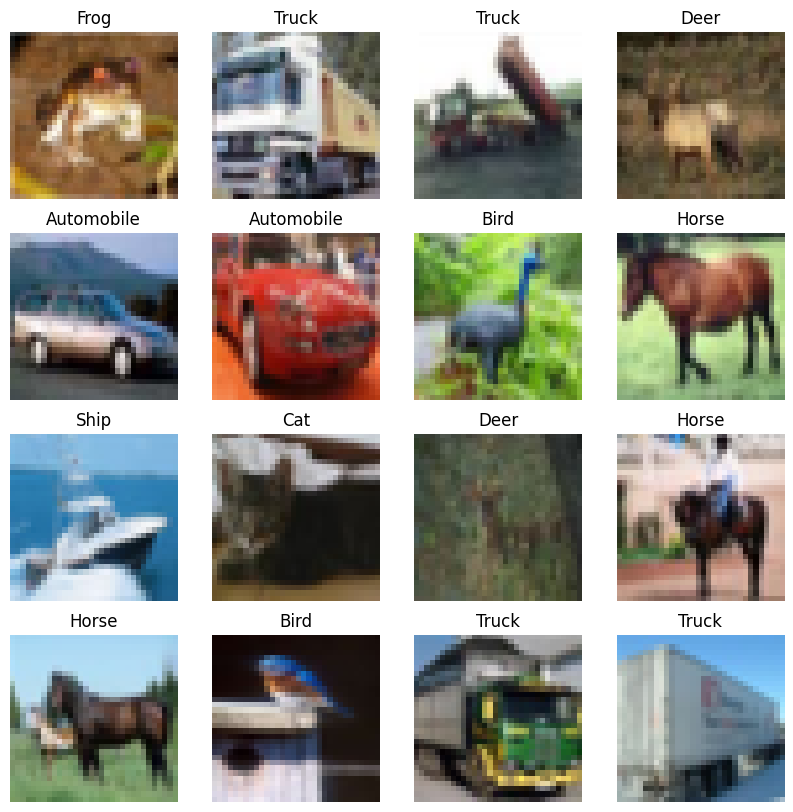

In [4]:
# Map category names
class_names = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer',
               'Dog', 'Frog', 'Horse', 'Ship', 'Truck']

# Preview some images
plt.figure(figsize=(10, 10))
for i in range(16):
    plt.subplot(4, 4, i + 1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i][0]])
    plt.axis('off')
plt.show()

In [5]:
# Step 2: Data Augmentation
print("Applying data augmentation...")
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True
)
datagen.fit(x_train)

Applying data augmentation...


In [6]:
# Step 3: Build Model using Transfer Learning
print("Building the model...")
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

Building the model...
94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [7]:
# Freeze the base model
base_model.trainable = False

In [8]:
# Add custom layers for CIFAR-10
x = Flatten()(base_model.output)
x = Dense(128, activation='relu')(x)
output = Dense(10, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=output)

In [9]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [10]:
# Step 4: Train the Model
print("Training the model...")
history = model.fit(
    datagen.flow(x_train, y_train, batch_size=32),
    epochs=10,
    validation_data=(x_test, y_test)
)

Training the model...
Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 299s 185ms/step - accuracy: 0.1925 - loss: 2.2180 - val_accuracy: 0.2814 - val_loss: 1.9370
Epoch 2/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 281s 180ms/step - accuracy: 0.2712 - loss: 1.9757 - val_accuracy: 0.3338 - val_loss: 1.8458
Epoch 3/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 322s 180ms/step - accuracy: 0.2962 - loss: 1.9211 - val_accuracy: 0.3306 - val_loss: 1.8336
Epoch 4/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 282s 180ms/step - accuracy: 0.3149 - loss: 1.8936 - val_accuracy: 0.3349 - val_loss: 1.8145
Epoch 5/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 320s 179ms/step - accuracy: 0.3241 - loss: 1.8643 - val_accuracy: 0.3597 - val_loss: 1.7878
Epoch 6/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 325s 181ms/step - accuracy: 0.3277 - loss: 1.8572 - val_accuracy: 0.3694 - val_loss: 1.7520
Epoch 7/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 181ms/step - accuracy: 0.3335 - loss: 1.8441 - val_accuracy: 0.3596 - val_loss: 1.7665
Epoch 8/10
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 321s 180ms/step - accuracy: 0.3

In [11]:
# Step 5: Evaluate the Model
print("Evaluating the model...")
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

Evaluating the model...
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 135ms/step - accuracy: 0.3755 - loss: 1.7523
Test Accuracy: 36.93%


In [13]:
# Step 6: Save the Model
print("Saving the model...")
model.save("cifar10_resnet50.keras")


Saving the model...


In [14]:
# Step 7: Plot Training History
plt.figure(figsize=(12, 5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

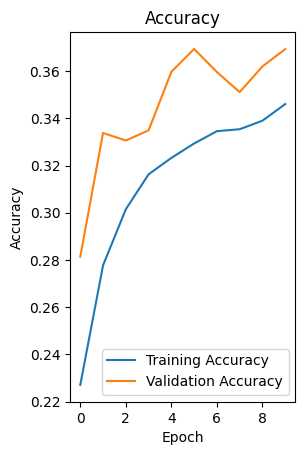

In [15]:
# Plot accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()


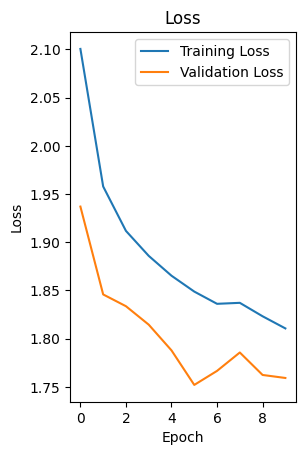

In [16]:
# Plot loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()